In [2]:
import seaborn as sns
import pickle 


In [3]:
import pandas as pd
import numpy as np

In [4]:
pd.set_option('display.max_rows', 200)

In [30]:
year19_path_list=  ['turnstile_190504.txt', 'turnstile_190511.txt','turnstile_190518.txt','turnstile_190525.txt']
year18_path_list=  ['turnstile_180505.txt', 'turnstile_180512.txt','turnstile_180519.txt','turnstile_180526.txt']
year17_path_list=  ['turnstile_170506.txt', 'turnstile_170513.txt','turnstile_170520.txt','turnstile_170527.txt']

In [6]:
def load_data(list_of_datasets):
    year = pd.concat(map(lambda x: pd.read_csv(x,parse_dates=[['DATE','TIME']]), 
        list_of_datasets))
    return year

In [7]:
def preprocessing(dataframe):
    dataframe.reset_index(drop=True,inplace=True)
    dataframe.drop(['C/A','LINENAME','DIVISION', 'DESC'],axis=1,inplace = True)
    dataframe['UNIT/SCP']= dataframe['UNIT'] + dataframe['SCP'] #creating an ideantifier column 
    dataframe =  dataframe[(dataframe['DATE_TIME'].dt.month > 4)]
    dataframe = dataframe.sort_values(['STATION', 'UNIT/SCP','DATE_TIME'], ascending= True)
    return  dataframe
    

In [8]:
def calculate_entries_column(dataframe):
    dataframe.reset_index(drop=True,inplace=True)
    dataframe['ENTRIES_DIFF']=0
    for index, row in dataframe.iterrows():
        if index == 0:
            continue
        if row['UNIT/SCP'] == dataframe['UNIT/SCP'][index-1] and row['STATION'] == dataframe['STATION'][index-1] and row['ENTRIES'] > int(dataframe['ENTRIES'][index-1]):
            dataframe['ENTRIES_DIFF'][index] = row['ENTRIES'] - int(dataframe['ENTRIES'][index-1])
            
    return dataframe

In [9]:
def calculate_exits_column(dataframe):
    dataframe.columns=dataframe.columns.str.strip()
    dataframe.reset_index(drop=True,inplace=True)
    dataframe['EXITS_DIFF']=0
    for index, row in dataframe.iterrows():
        if index == 0:
            continue
        if row['UNIT/SCP'] == dataframe['UNIT/SCP'][index-1] and row['STATION'] == dataframe['STATION'][index-1] and row['EXITS'] > int(dataframe['EXITS'][index-1]):
            dataframe['EXITS_DIFF'][index] = row['EXITS'] - int(dataframe['EXITS'][index-1])
            
    return dataframe

In [10]:
def calculate_total_traffic(dataframe):
    dataframe['TOTAL_TRAFFIC']= dataframe['ENTRIES_DIFF'] + dataframe['EXITS_DIFF']
    return dataframe

In [11]:
def generate_stat(dataframe):
    year19_traffic_per_station = dataframe.groupby('STATION').TOTAL_TRAFFIC.sum()
    year19_traffic_per_station = pd.DataFrame(year19_traffic_per_station)
    sorted_traffic = year19_traffic_per_station.sort_values(by=['TOTAL_TRAFFIC'], ascending= False)
    return sorted_traffic

In [12]:
def pickle_df(dataframe,filename):
    with open(filename+".pickle","wb")as to_write:
        pickle.dump(dataframe,to_write)

In [13]:
def read_pickle(file_name):
    with open(file_name, 'rb') as f:
        dataframe = pickle.load(f)
        return dataframe

In [14]:
def init_dataframe(years_list):
    year=load_data(years_list)
    year = preprocessing(year)
    year = calculate_entries_column(year)
    year = calculate_exits_column(year)
    return year 

In [15]:
def graph_stats(stats):
    stats = stats.head(5)
    stats = stats.reset_index()
    stats.columns
    sns.barplot(x=stats['TOTAL_TRAFFIC'], y=stats['STATION'])

In [18]:
# year19 = init_dataframe(year19_path_list)

/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [19]:
#HANDLING OUTLIERS 

In [20]:
year19['ENTRIES_DIFF'][81250] = 142

/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
year19['ENTRIES_DIFF'][17616] = 142

/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
year19['EXITS_DIFF'][81250] = 0

/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
year19['EXITS_DIFF'][17616] = 0

/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
# year19 = calculate_total_traffic(year19)


In [25]:
# pickle_df(year19,'MTA_19')

In [26]:
year19_pickle = read_pickle('MTA_19.pickle')

In [27]:
year19_pickle

,DATE_TIME,UNIT,SCP,STATION,ENTRIES,EXITS,UNIT/SCP,ENTRIES_DIFF,EXITS_DIFF,TOTAL_TRAFFIC
0,2019-05-01 00:00:00,R248,00-00-00,1 AV,14654538,16381430,R24800-00-00,0,0,0
1,2019-05-01 04:00:00,R248,00-00-00,1 AV,14654538,16381436,R24800-00-00,0,6,6
2,2019-05-01 08:00:00,R248,00-00-00,1 AV,14654889,16382236,R24800-00-00,351,800,1151
3,2019-05-01 12:00:00,R248,00-00-00,1 AV,14656102,16383435,R24800-00-00,1213,1199,2412
4,2019-05-01 16:00:00,R248,00-00-00,1 AV,14656924,16384214,R24800-00-00,822,779,1601
...,...,...,...,...,...,...,...,...,...,...
705134,2019-05-24 05:00:00,R326,00-05-01,ZEREGA AV,39,148,R32600-05-01,0,0,0
705135,2019-05-24 09:00:00,R326,00-05-01,ZEREGA AV,39,148,R32600-05-01,0,0,0
705136,2019-05-24 13:00:00,R326,00-05-01,ZEREGA AV,39,148,R32600-05-01,0,0,0
705137,2019-05-24 17:00:00,R326,00-05-01,ZEREGA AV,39,148,R32600-05-01,0,0,0


In [28]:
stats = generate_stat(year19_pickle)

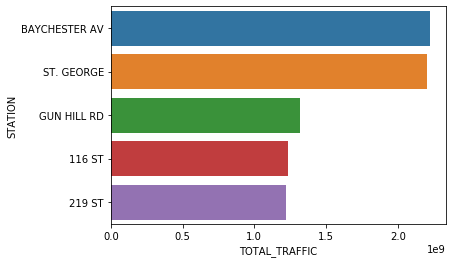

In [29]:
graph_stats(stats)

In [130]:
# year18 = init_dataframe(year18_path_list)

/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [150]:
pickle_df(year18,'MTA_18' )

In [152]:
year18_pickle = read_pickle('MTA_18.pickle')

In [31]:
year17 = init_dataframe(year17_path_list)

/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/hi/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [32]:
pickle_df(year17,'MTA_17')

In [35]:
year17_pickle = read_pickle('MTA_17.pickle')

In [36]:
year17_pickle

,DATE_TIME,UNIT,SCP,STATION,ENTRIES,EXITS,UNIT/SCP,ENTRIES_DIFF,EXITS_DIFF
0,2017-05-01 00:00:00,R248,00-00-00,1 AV,12282354,13541843,R24800-00-00,0,0
1,2017-05-01 04:00:00,R248,00-00-00,1 AV,12282381,13541919,R24800-00-00,27,76
2,2017-05-01 08:00:00,R248,00-00-00,1 AV,12282732,13542797,R24800-00-00,351,878
3,2017-05-01 12:00:00,R248,00-00-00,1 AV,12284169,13543907,R24800-00-00,1437,1110
4,2017-05-01 16:00:00,R248,00-00-00,1 AV,12285115,13544659,R24800-00-00,946,752
...,...,...,...,...,...,...,...,...,...
728656,2017-05-26 05:00:00,R326,00-05-01,ZEREGA AV,39,65,R32600-05-01,0,0
728657,2017-05-26 09:00:00,R326,00-05-01,ZEREGA AV,39,65,R32600-05-01,0,0
728658,2017-05-26 13:00:00,R326,00-05-01,ZEREGA AV,39,65,R32600-05-01,0,0
728659,2017-05-26 17:00:00,R326,00-05-01,ZEREGA AV,39,65,R32600-05-01,0,0
